Data Wrangling

In [1350]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('wandaloo_cars.csv', delimiter=',')
df.head()

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN


Steps for working with missing data:

Identify missing data

1.Deal with missing data
2.Correct data format
3.Identify missing values

In the car dataset, missing data comes with NaN (Not a Number), which is Python's default missing value marker for reasons of computational speed and convenience.

Evaluating for Missing Data
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

1/ .isnull()
2/ .notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data

In [1351]:
missing_data = df.isnull()
missing_data.head(5)

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


"True" stands for missing value, while "False" stands for not missing value.

Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column."True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [1352]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("") 

Brand
False    3063
True       66
Name: Brand, dtype: int64

Model
False    3063
True       66
Name: Model, dtype: int64

Version
False    2180
True      949
Name: Version, dtype: int64

Price
False    3063
True       66
Name: Price, dtype: int64

Modèle
False    2180
True      949
Name: Modèle, dtype: int64

Main
False    2180
True      949
Name: Main, dtype: int64

Kilométrage
False    2180
True      949
Name: Kilométrage, dtype: int64

Carburant
False    2166
True      963
Name: Carburant, dtype: int64

Transmision
False    2180
True      949
Name: Transmision, dtype: int64

Puissance fiscale
False    3048
True       81
Name: Puissance fiscale, dtype: int64

Couleur extérieure
False    2180
True      949
Name: Couleur extérieure, dtype: int64

Etat du véhicule
False    2180
True      949
Name: Etat du véhicule, dtype: int64

Climatisation
False    3048
True       81
Name: Climatisation, dtype: int64

Vitres électriques
False    3048
True       81
Name: Vitres électriques, dtype: int

Each column has 3128 rows of data and 43 columns containing missing data:

"Modèle": 66 missing data
"Price": 66 missing data
"Puissance fiscale": 81 missing data
"Cylindrée" : 2284 missing data
"Conso. route": 2284 missing data
"Vitesse maxi.": 2261 missing data
"Volume du réservoir": 2284 missing data
.
.
.

Deal with missing data
1.drop data
    a. drop the whole row
    b. drop the whole column
2.replace data
    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, some columns are empty enough to drop entirely (Architecture 2284 missing data
Cylindrée 2284 missing data
conso. ville 2284 missing data
conso. route 2284 missing data
Vitesse maxi. 2261 missing data
Volume du réservoire 2284 missing data).
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

Replace by mean:

    "Modèle": 949 missing data, replace them with mean
    "Kilométrage": replace missing data with mean
    "Puissance fiscale": replace missing data with mean
    "Cylindrée"
    "Conso. ville"
    "Conso. route"
    "Vitesse maxi."
    "Volume du réservoir"
    

Replace by frequency:

    "Main": 949 missing data, replace them with "Seconde".
        Reason: 60% sedans is seconde main. Since seconde main is most frequent, it is most likely to occur
    "Carburant": 963 missing data, replace them with "Diesel"
        Reason: 90% sedans is diesel carburant
    "Transmision": 949 missing data, replace them with "Manuelle"
    "Couleur extérieure": 949 missing data, replace them with "Noir"
    "Climatisation" 81 missing data, replace them with ""
    Vitre électriques: 81 missing data, replace them with ""
    "Sièges électriques": 101 missing data, replace them with "non"
    "Ordinateur de board":
    "Allumage auto. des feux":
    "Start & Stop"; replace missing data with "oui"
Drop the whole row:

"price": 66 missing data, simply delete the whole row
        Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us
"Brand", "Model", "Version", "Kilométrage", "Puissance fiscale", "Etat du véhicule"
Drop the whole columns:
(Architecture 2284 missing data
Cylindrée 2284 missing data
conso. ville 2284 missing data
conso. route 2284 missing data
Vitesse maxi. 2261 missing data
Volume du réservoire 2284 missing data).
    Reason: most entries in the columns are empty

Calculate the average of the columns : "Modèle", 'Puissance fiscale'

In [1353]:
avg_modèle = df["Modèle"].astype("float").mean(axis=0)
print("Average of modèle:", avg_modèle)

Average of modèle: 2012.0022935779816


In [1354]:
import numpy as np
df["Modèle"].replace(np.nan,avg_modèle,inplace=True)

In [1355]:
df['Kilométrage'] = df['Kilométrage'].str.replace(' km','')
df['Kilométrage'] = df['Kilométrage'].str.replace('.','')

df['Kilométrage'] = df['Kilométrage'].astype(float)
print(df['Kilométrage'])


0       144500.0
1       350000.0
2       144000.0
3       248000.0
4       103000.0
          ...   
3124         NaN
3125         NaN
3126         NaN
3127         NaN
3128         NaN
Name: Kilométrage, Length: 3129, dtype: float64


C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\1646309844.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Kilométrage'] = df['Kilométrage'].str.replace('.','')


In [1356]:
#Calculate the average of the columns : "Kilométrage", 'Puissance fiscale'
avg_Kilométrage = df["Kilométrage"].mean(axis=0)
print("Average of modèle:", avg_Kilométrage)

Average of modèle: 148788.91880733945


In [1357]:
#replace "nan" with the average of Kilométrage column
df["Kilométrage"].replace(np.nan,avg_Kilométrage,inplace=True)

In [1358]:

df['Puissance fiscale'] = df['Puissance fiscale'].str.replace('[^\d\.]+', '')
df['Puissance fiscale'] = pd.to_numeric(df['Puissance fiscale'], errors='coerce')

# replace empty values with NaN
df['Puissance fiscale'].replace('', np.nan, inplace=True)
print(df['Puissance fiscale'])


0        8.0
1        8.0
2        8.0
3        9.0
4        9.0
        ... 
3124     8.0
3125     8.0
3126     8.0
3127    11.0
3128    11.0
Name: Puissance fiscale, Length: 3129, dtype: float64


C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\2458007018.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Puissance fiscale'] = df['Puissance fiscale'].str.replace('[^\d\.]+', '')


In [1359]:
#Calculate the average of the columns : "Puissance fiscale", 'Puissance fiscale'
avg_Puissance_fiscale = df["Puissance fiscale"].mean(axis=0)
print("Average of Puissance fiscale:", avg_Puissance_fiscale)

Average of Puissance fiscale: 8.294203426904849


In [1360]:
#replace "nan" with the average of Puissance fiscale column
df["Puissance fiscale"].replace(np.nan,avg_Puissance_fiscale,inplace=True)

In [1361]:
df['Conso. ville'] = df['Conso. ville'].str.replace('[^\d\.]+', '')
df['Conso. ville'] = pd.to_numeric(df['Conso. ville'], errors='coerce')
print(df['Conso. ville'])
#Calculate the average of the columns : "Conso. ville", 
avg_Conso_ville = df["Conso. ville"].mean(axis=0)
print("Average of Conso. ville:", avg_Conso_ville)
#replace "nan" with the average of Conso. ville column
df["Conso. ville"].replace(np.nan,avg_Conso_ville,inplace=True)
print(df['Conso. ville'])


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3124    63100.0
3125    63100.0
3126    63100.0
3127      100.0
3128      100.0
Name: Conso. ville, Length: 3129, dtype: float64
Average of Conso. ville: 56806.508875739644
0       56806.508876
1       56806.508876
2       56806.508876
3       56806.508876
4       56806.508876
            ...     
3124    63100.000000
3125    63100.000000
3126    63100.000000
3127      100.000000
3128      100.000000
Name: Conso. ville, Length: 3129, dtype: float64


C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\1444541185.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Conso. ville'] = df['Conso. ville'].str.replace('[^\d\.]+', '')


In [1362]:
df['Conso. route'] = df['Conso. route'].str.replace('[^\d\.]+', '')
df['Conso. route'] = pd.to_numeric(df['Conso. route'], errors='coerce')
print(df['Conso. route'])
#Calculate the average of the columns : "Conso. route", 
avg_Conso_route = df["Conso. route"].mean(axis=0)
print("Average of Conso. route:", avg_Conso_route)
#replace "nan" with the average of Conso. route column
df["Conso. route"].replace(np.nan,avg_Conso_route,inplace=True)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3124    54100.0
3125    54100.0
3126    54100.0
3127      100.0
3128      100.0
Name: Conso. route, Length: 3129, dtype: float64
Average of Conso. route: 41851.47928994083


C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3487788989.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Conso. route'] = df['Conso. route'].str.replace('[^\d\.]+', '')


In [1363]:
df['Vitesse maxi.'] = df['Vitesse maxi.'].str.replace('[^\d\.]+', '')
df['Vitesse maxi.'] = pd.to_numeric(df['Vitesse maxi.'], errors='coerce')
print(df['Vitesse maxi.'])
#Calculate the average of the columns : "Vitesse maxi. ", 
avg_Vitesse_maxi = df["Vitesse maxi."].mean(axis=0)
print("Average of Vitesse maxi.:", avg_Vitesse_maxi)
#replace "nan" with the average of Vitesse maxi. column
df["Vitesse maxi."].replace(np.nan,avg_Vitesse_maxi,inplace=True)	

C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\293924665.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Vitesse maxi.'] = df['Vitesse maxi.'].str.replace('[^\d\.]+', '')


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
3124    220.0
3125    220.0
3126    220.0
3127    230.0
3128    230.0
Name: Vitesse maxi., Length: 3129, dtype: float64
Average of Vitesse maxi.: 208.5467289719626


In [1364]:
df['Cylindrée'] = df['Cylindrée'].str.replace('[^\d\.]+', '')
df['Cylindrée'] = pd.to_numeric(df['Cylindrée'], errors='coerce')
print(df['Cylindrée'])
#Calculate the average of the columns : "Cylindrée ", 
avg_Cylindrée = df["Cylindrée"].mean(axis=0)
print("Average of Cylindrée:", avg_Cylindrée)
#replace "nan" with the average of Cylindrée column
df["Cylindrée"].replace(np.nan,avg_Cylindrée,inplace=True)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
3124    1.969
3125    1.969
3126    1.969
3127    1.969
3128    1.969
Name: Cylindrée, Length: 3129, dtype: float64
Average of Cylindrée: 39.78637633136094


C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3443565177.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cylindrée'] = df['Cylindrée'].str.replace('[^\d\.]+', '')


In [1365]:
df['Volume du réservoir'] = df['Volume du réservoir'].str.replace('[^\d\.]+', '')
df['Volume du réservoir'] = pd.to_numeric(df['Volume du réservoir'], errors='coerce')
print(df['Volume du réservoir'])
#Calculate the average of the columns : "Volume du réservoir ", 
avg_Volume_du_réservoir = df["Volume du réservoir"].mean(axis=0)
print("Average of Volume du réservoir:", avg_Volume_du_réservoir)
#replace "nan" with the average of Volume du réservoir column
df["Volume du réservoir"].replace(np.nan,avg_Volume_du_réservoir,inplace=True)

C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3162213112.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Volume du réservoir'] = df['Volume du réservoir'].str.replace('[^\d\.]+', '')


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3124    71.0
3125    71.0
3126    71.0
3127    71.0
3128    71.0
Name: Volume du réservoir, Length: 3129, dtype: float64
Average of Volume du réservoir: 57.66222760290557


To see which values are present in a particular column,use the ".value_counts()" method:

In [1366]:
df['Main'].value_counts()

Seconde     1126
Première    1054
Name: Main, dtype: int64

We can see that seconde main is the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:



In [1367]:
df['Main'].value_counts().idxmax()


'Seconde'

In [1368]:
#replace the missing 'Main' values by the most frequent 
df['Main'].replace(np.nan,"Seconde",inplace=True)

In [1369]:
df['Carburant'].value_counts()

Diesel        1902
Essence        256
Hybride          7
Electrique       1
Name: Carburant, dtype: int64

In [1370]:
df['Carburant'].value_counts().idxmax()

'Diesel'

In [1371]:
#replace the missing 'Crburant' values by the most frequent 
df['Carburant'].replace(np.nan,"Diesel",inplace=True)

In [1372]:
df['Transmision'].value_counts()

Manuelle       1146
Automatique    1034
Name: Transmision, dtype: int64

In [1373]:
#replace the missing 'Transmision' values by the most frequent 
df['Transmision'].replace(np.nan,"Manuelle",inplace=True)

In [1374]:
df['Couleur extérieure'].value_counts()

Noir             617
Blanc            280
Gris foncé       224
Gris             222
-                219
Gris clair       155
Bleu foncé        87
Autre couleur     67
Marron            50
Bleu              49
Rouge             47
Beige             31
Blanc cassé       24
Bleu ciel         23
Bordeau           21
Marron clair      17
Vert foncé        13
Jaune d'or        10
Violet             9
Vert               9
Orange             2
Jaune              2
Rose               2
Name: Couleur extérieure, dtype: int64

In [1375]:
#replace the missing 'Couleur extérieure' values by the most frequent 
df['Couleur extérieure'].replace(np.nan,"Noir",inplace=True)

In [1376]:
df['Climatisation'].value_counts()


auto. Bi-zone        946
manuelle             926
auto.                513
non                  409
auto. Tri-zone       141
auto. Multi-zone      59
auto. Quadri-zone     53
تلقاءي.                1
Name: Climatisation, dtype: int64

In [1377]:
#replace the missing 'Climatisation' values by the most frequent 
df['Climatisation'].replace(np.nan,"auto. Bi-zone",inplace=True)

In [1378]:
df['Vitres électriques'].value_counts()


Electrique AV/AR    1935
Electrique AV        657
-                    445
non                    8
Electrique AR          3
Name: Vitres électriques, dtype: int64

In [1379]:
#replace the missing 'Vitres électriques' values by the most frequent 
df['Vitres électriques'].replace(np.nan,"Electrique AV/AR",inplace=True)

In [1380]:
df['Sièges électriques'].value_counts()


non                       2006
Conducteur et Passager     594
Conducteur                 340
Tous les passagers          76
Passager                    12
Name: Sièges électriques, dtype: int64

In [1381]:
#replace the missing 'Vitres électriques' values by the most frequent 
df['Sièges électriques'].replace(np.nan,"non",inplace=True)

In [1382]:
df['Ordinateur de bord'].value_counts()



oui    2192
non     856
Name: Ordinateur de bord, dtype: int64

In [1383]:
#replace the missing 'Ordinateur de bord' values by the most frequent 
df['Ordinateur de bord'].replace(np.nan,"oui",inplace=True)

In [1384]:
df['Start & Stop'].value_counts()



non    1775
oui    1273
Name: Start & Stop, dtype: int64

In [1385]:
#replace the missing 'Start & Stop' values by the most frequent 
df['Start & Stop'].replace(np.nan,"oui",inplace=True)

In [1386]:
df['Régulateur de vitesse'].value_counts()


oui    2186
non     862
Name: Régulateur de vitesse, dtype: int64

In [1387]:
#replace the missing 'Régulateur de vitesse' values by the most frequent 
df['Régulateur de vitesse'].replace(np.nan,"oui",inplace=True)

In [1388]:
df['Allumage auto. des feux'].value_counts()


oui    1742
non    1306
Name: Allumage auto. des feux, dtype: int64

In [1389]:
#replace the missing 'Allumage auto. des feux' values by the most frequent 
df['Allumage auto. des feux'].replace(np.nan,"oui",inplace=True)

In [1390]:
df['Détecteur de pluie'].value_counts()


oui    1590
non    1458
Name: Détecteur de pluie, dtype: int64

In [1391]:
#replace the missing 'Détecteur de pluie' values by the most frequent 
df['Détecteur de pluie'].replace(np.nan,"oui",inplace=True)

In [1392]:
df['Commandes au volant'].value_counts()

oui    2132
non     916
Name: Commandes au volant, dtype: int64

In [1393]:
#replace the missing 'Commandes au volant' values by the most frequent 
df['Commandes au volant'].replace(np.nan,"oui",inplace=True)

In [1394]:

df['Ecran tactile'].value_counts()

oui    1662
non    1386
Name: Ecran tactile, dtype: int64

In [1395]:
#replace the missing 'Ecran tactile' values by the most frequent 
df['Ecran tactile'].replace(np.nan,"oui",inplace=True)

In [1396]:
df['Rétroviseurs électriques'].value_counts()

oui    2139
non     909
Name: Rétroviseurs électriques, dtype: int64

In [1397]:
#replace the missing 'Rétroviseurs électriques' values by the most frequent 
df['Rétroviseurs électriques'].replace(np.nan,"oui",inplace=True)

In [1398]:
df['Démarrage mains libres'].value_counts()

non    1666
oui    1382
Name: Démarrage mains libres, dtype: int64

In [1399]:
#replace the missing 'Démarrage mains libres' values by the most frequent 
df['Démarrage mains libres'].replace(np.nan,"non",inplace=True)

In [1400]:
df['Banquette arrière rabattable 1/3-2/3'].value_counts()

oui    1655
non    1393
Name: Banquette arrière rabattable 1/3-2/3, dtype: int64

In [1401]:
#replace the missing 'Banquette arrière rabattable 1/3-2/3' values by the most frequent 
df['Banquette arrière rabattable 1/3-2/3'].replace(np.nan,"oui",inplace=True)

In [1402]:
df['Caméra de recul'].value_counts()

non    1706
oui    1342
Name: Caméra de recul, dtype: int64

In [1403]:
#replace the missing 'Caméra de recul' values by the most frequent 
df['Caméra de recul'].replace(np.nan,"non",inplace=True)

In [1404]:
df['Bluetooth'].value_counts()

oui    2116
non     932
Name: Bluetooth, dtype: int64

In [1405]:
#replace the missing 'Bluetooth' values by the most frequent 
df['Bluetooth'].replace(np.nan,"oui",inplace=True)

In [1406]:
df['Jantes aluminium'].value_counts()

oui          1429
non           837
18 pouces     198
17 pouces     187
19 pouces     155
16 pouces     107
20 pouces      76
21 pouces      24
15 pouces      22
14 pouces       8
22 pouces       5
Name: Jantes aluminium, dtype: int64

In [1407]:
#replace the missing 'Jantes aluminium' values by the most frequent 
df['Jantes aluminium'].replace(np.nan,"oui",inplace=True)

In [1408]:
df['Volant cuir'].value_counts()

non    1830
oui    1218
Name: Volant cuir, dtype: int64

In [1409]:
#replace the missing 'Volant cuir' values by the most frequent 
df['Volant cuir'].replace(np.nan,"non",inplace=True)

In [1410]:
df['Feux de jour'].value_counts()

oui    1870
non    1178
Name: Feux de jour, dtype: int64

In [1411]:
#replace the missing 'Feux de jour' values by the most frequent 
df['Feux de jour'].replace(np.nan,"oui",inplace=True)

In [1412]:
df['Barres de toit'].value_counts()

non    2316
oui     732
Name: Barres de toit, dtype: int64

In [1413]:
#replace the missing 'Barres de toit' values by the most frequent 
df['Barres de toit'].replace(np.nan,"non",inplace=True)

In [1414]:
df['Toit'].value_counts()

Rigide                 2394
Panoramique ouvrant     362
Panoramique             198
Ouvrant                  94
Name: Toit, dtype: int64

In [1415]:
#replace the missing 'Toit' values by the most frequent 
df['Toit'].replace(np.nan,"Rigide",inplace=True)

In [1416]:
df['Airbags'].value_counts()

oui     1922
6.0      290
non      258
8.0      183
7.0      171
2.0      117
4.0       51
9.0       24
10.0      23
0.0        7
1.0        2
Name: Airbags, dtype: int64

In [1417]:
#replace the missing 'Airbags' values by the most frequent 
df['Airbags'].replace(np.nan,"oui",inplace=True)

In [1418]:
df['ABS'].value_counts()

oui    2704
non     344
Name: ABS, dtype: int64

In [1419]:
#replace the missing 'ABS' values by the most frequent 
df['ABS'].replace(np.nan,"oui",inplace=True)

In [1420]:
df['ESP'].value_counts()

oui    2235
non     813
Name: ESP, dtype: int64

In [1421]:
#replace the missing 'ESP' values by the most frequent 
df['ESP'].replace(np.nan,"oui",inplace=True)

In [1422]:
df['Antipatinage'].value_counts()

oui    2094
non     954
Name: Antipatinage, dtype: int64

In [1423]:
#replace the missing 'Antipatinage' values by the most frequent 
df['Antipatinage'].replace(np.nan,"oui",inplace=True)

In [1424]:
# Delete some columns by name ['Conso. ville', 'Conso. route', 'Vitesse maxi.', 'Volume du réservoir']
#df = df.drop(['Architecture', 'Cylindrée', 'Conso. ville', 'Conso. route', 'Vitesse maxi.', 'Volume du réservoir'], axis=1)
#print(df)

Finally, let's drop all rows that do not have price, brand, model... data:

In [1425]:
# simply drop whole row with NaN in "price", "Brand", "Model", "Version" columns
df.dropna(subset=["Price"],axis=0,inplace=True)
df.dropna(subset=["Brand"],axis=0,inplace=True)
df.dropna(subset=["Model"],axis=0,inplace=True)
df.dropna(subset=["Version"],axis=0,inplace=True)
#df.dropna(subset=["Kilométrage"],axis=0,inplace=True)
#df.dropna(subset=["Puissance fiscale"],axis=0,inplace=True)
df.dropna(subset=["Etat du véhicule"],axis=0,inplace=True)
df.dropna(subset=["Ouverture auto. du coffre"],axis=0,inplace=True)


# reset index, because we droped two rows
df.reset_index(drop=True,inplace=True)

In [1426]:
df.head()

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144500.0,Diesel,Automatique,8.0,...,oui,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228


Convert data types to proper format

In [1427]:
df['Price'] = df['Price'].str.replace(' VENDUE','')
df['Price'] = df['Price'].str.replace(' DH','')
df['Price'] = df['Price'].str.replace(' * promo','')
df['Price'] = df['Price'].str.replace('.','')
df['Price'] = df['Price'].str.replace(' *','')
df['Price'] = df['Price'].str.replace('*','')
df['Price'] = df['Price'].str.replace('Prixpublic','')


df['Price'] = df['Price'].astype(float)

C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3965877181.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace(' * promo','')
C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3965877181.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('.','')
C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3965877181.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace(' *','')
C:\Users\GeekStore\AppData\Local\Temp\ipykernel_3716\3965877181.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal s

Now, the dataset with no missing values is obtained.

Lets list the data types for each column

In [1428]:
df.dtypes

Brand                                    object
Model                                    object
Version                                  object
Price                                   float64
Modèle                                  float64
Main                                     object
Kilométrage                             float64
Carburant                                object
Transmision                              object
Puissance fiscale                       float64
Couleur extérieure                       object
Etat du véhicule                         object
Climatisation                            object
Vitres électriques                       object
Sièges électriques                       object
Ordinateur de bord                       object
Start & Stop                             object
Régulateur de vitesse                    object
Allumage auto. des feux                  object
Détecteur de pluie                       object
Commandes au volant                     

Finally the cleaned dataset is obtained with no missing values and all data in its proper format.

Data Standardization
Data is usually collected from different agencies with different formats. (Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

Data Normalization
Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [1429]:
df["Puissance fiscale"] = df["Puissance fiscale"].astype(int,copy=True)

Plot the histogram of Puissance fiscale in order to see what the distribution of Puissance fiscale looks like.

Text(0.5, 1.0, 'Puissance fiscale BINS')

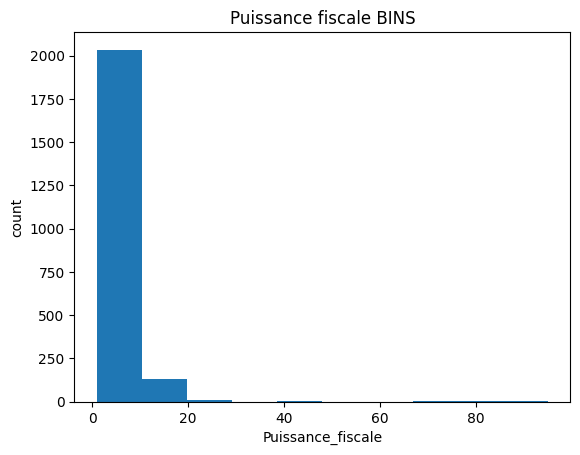

In [1430]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["Puissance fiscale"])

plt.xlabel("Puissance_fiscale")
plt.ylabel("count")
plt.title("Puissance fiscale BINS")

3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4

In [1431]:
bins = np.linspace(min(df["Puissance fiscale"]),max(df["Puissance fiscale"]),4)
bins

array([ 1.        , 32.33333333, 63.66666667, 95.        ])

We set group names:

In [1432]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" the determine what each value of "df['Puissance fiscale']" belongs to.

In [1433]:
df['Puissance fiscale-binned'] = pd.cut(df['Puissance fiscale'], bins, labels=group_names ,include_lowest = True)
df[['Puissance fiscale','Puissance fiscale-binned']].head(20)

,Puissance fiscale,Puissance fiscale-binned
0,8,Low
1,8,Low
2,8,Low
3,9,Low
4,9,Low
5,9,Low
6,8,Low
7,9,Low
8,9,Low
9,6,Low


Lets see the number of vehicles in each bin.

In [1434]:
df["Puissance fiscale-binned"].value_counts()

Low       2172
High         7
Medium       1
Name: Puissance fiscale-binned, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'Puissance fiscale bins')

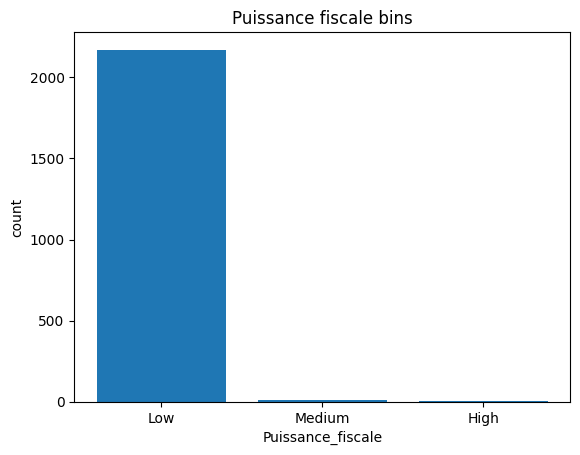

In [1435]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Puissance fiscale-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Puissance_fiscale")
plt.pyplot.ylabel("count")
plt.pyplot.title("Puissance fiscale bins")

Bins visualization
Normally, a histogram is used to visualize the distribution of bins

Text(0.5, 1.0, 'Puissance fiscale bins')

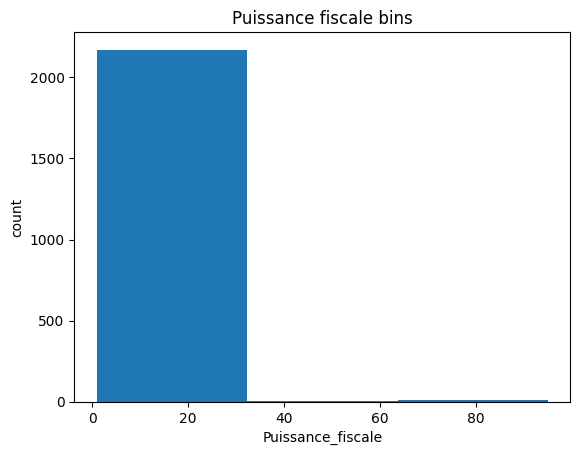

In [1436]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "Puissance fiscale" with bins = 3
plt.pyplot.hist(df["Puissance fiscale"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Puissance_fiscale")
plt.pyplot.ylabel("count")
plt.pyplot.title("Puissance fiscale bins")

In [1437]:
df.head()

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir,Puissance fiscale-binned
0,MERCEDES,Classe C 2014,220 d,228000.0,2014.0,Seconde,144500.0,Diesel,Automatique,8,...,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228,Low
1,MERCEDES,Classe C 2003,220 CDI,79000.0,2003.0,Seconde,350000.0,Diesel,Manuelle,8,...,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228,Low
2,MERCEDES,Classe B 2013,180 d Urban,150000.0,2013.0,Seconde,144000.0,Diesel,Manuelle,8,...,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228,Low
3,MERCEDES,Classe E 2006,Autre version,135000.0,2006.0,Seconde,248000.0,Diesel,Automatique,9,...,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228,Low
4,MERCEDES,CLA Coupé 2014,220 CDI,240000.0,2014.0,Seconde,103000.0,Diesel,Automatique,9,...,oui,oui,oui,NaN,39.786376,56806.508876,41851.47929,208.546729,57.662228,Low


Save the new csv

In [1438]:
df.to_csv('clean_df.csv')